In [1]:
import numpy as np
import nibabel as nib
import util
import scipy.special
import map
import matplotlib.pyplot as plt

In [2]:
coeffs = nib.load("/home/adam/GoogleDrive/Test_Output/MAP/coeffs.nii")
uvecs = nib.load("/home/adam/GoogleDrive/Test_Output/MAP/uvecs.nii")
mask = nib.load("/home/adam/GoogleDrive/Test_Output/MAP/mask.nii")
coeffs = coeffs.get_data()
uvecs = uvecs.get_data()
mask = mask.get_data()

In [3]:
ymn = map.calc_ymn(6,4)
umn = map.calc_umn([0.8, 1, 1.2],4)
moments = np.zeros((105,105,63,22))
for x in range(105):
    for y in range(105):
        for z in range(63):
            if mask[x,y,z] != 0:
                moments[x,y,z,:] = map.map_coeffs_to_moments(coeffs[x,y,z,:], uvecs[x,y,z,:], ymn, 6,4)

In [5]:
tensor,cumulants = map.moments_to_HOT(moments, 0.03, 0.04)
mk, k_par, k_perp, fa_k = map.calc_dki_params(tensor, 0.03, 0.04)

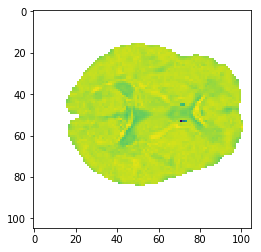

In [6]:
plt.imshow(mk[:,:,29])
plt.show()

In [3]:
mk, k_par, k_perp, fa_k = map.calc_gdti_params(coeffs, uvecs, mask, 0.03, 0.04, 6, moment_order=4)

dwi = nib.load("/home/adam/GoogleDrive/Test_Output/MAP/coeffs.nii")
img = nib.Nifti1Image(mk, dwi.affine, dwi.header)
nib.save(img, ("/home/adam/GoogleDrive/Test_Output/"+ 'Mean_Kurtosis.nii'))

img = nib.Nifti1Image(k_par, dwi.affine, dwi.header)
nib.save(img, ("/home/adam/GoogleDrive/Test_Output/" + 'Axial_Kurtosis.nii'))

img = nib.Nifti1Image(k_perp, dwi.affine, dwi.header)
nib.save(img, ("/home/adam/GoogleDrive/Test_Output/" + 'Perpindicular_Kurtosis.nii'))

img = nib.Nifti1Image(fa_k, dwi.affine, dwi.header)
nib.save(img, ("/home/adam/GoogleDrive/Test_Output/" + 'FA_Kurtosis.nii'))

Calculating GDTI Moments:      100.0 %                                                                                                                                                                                                        



map.py:944: RuntimeWarning: invalid value encountered in divide
  tensor[:,:,:,i] /= scale
map.py:948: RuntimeWarning: invalid value encountered in divide
  k[:,:,:,0] = (trace ** 2) / (tensor[:,:,:,0] ** 2) * tensor[:,:,:,6]
map.py:949: RuntimeWarning: invalid value encountered in divide
  k[:,:,:,1] = (trace ** 2) / (tensor[:,:,:,3] ** 2) * tensor[:,:,:,16]
map.py:950: RuntimeWarning: invalid value encountered in divide
  k[:,:,:,2] = (trace ** 2) / (tensor[:,:,:,5] ** 2) * tensor[:,:,:,20]
map.py:957: RuntimeWarning: invalid value encountered in divide
  fa_k = np.sqrt(1.5 * ((k[:,:,:,0]-mk)**2 + (k[:,:,:,1]-mk)**2 + (k[:,:,:,2]-mk)**2) / (k[:,:,:,0]**2 + k[:,:,:,1]**2 + k[:,:,:,2]**2))
